In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-population-statistics-2023/world_population_data.csv


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/world-population-statistics-2023/world_population_data.csv')
df

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.00,481,0.81%,17.85%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.00,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.00,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.00,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.00,312,1.98%,3.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,MSR,Montserrat,North America,4386,4390,4500,5059,4938,5138,10805,11452,11402,102.00,43,-0.09%,0.00%
230,231,FLK,Falkland Islands,South America,3791,3780,3747,3408,3187,3080,2332,2240,2274,12173.00,0,0.29%,0.00%
231,232,NIU,Niue,Oceania,1935,1934,1942,1847,1812,2074,2533,3637,5185,261.00,7,0.05%,0.00%
232,233,TKL,Tokelau,Oceania,1893,1871,1827,1454,1367,1666,1669,1647,1714,12.00,189,1.18%,0.00%


In [5]:
df.describe()

,rank,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²)
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000
mean,117.500000,3.437442e+07,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814500e+05,451.282051
std,67.694165,1.373864e+08,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,1979.398922
min,1.000000,5.180000e+02,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,4.400000e-01,0.000000
25%,59.250000,4.225982e+05,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,39.500000
50%,117.500000,5.643895e+06,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,97.500000
75%,175.750000,2.324537e+07,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,242.750000
max,234.000000,1.428628e+09,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,21403.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              234 non-null    int64  
 1   cca3              234 non-null    object 
 2   country           234 non-null    object 
 3   continent         234 non-null    object 
 4   2023 population   234 non-null    int64  
 5   2022 population   234 non-null    int64  
 6   2020 population   234 non-null    int64  
 7   2015 population   234 non-null    int64  
 8   2010 population   234 non-null    int64  
 9   2000 population   234 non-null    int64  
 10  1990 population   234 non-null    int64  
 11  1980 population   234 non-null    int64  
 12  1970 population   234 non-null    int64  
 13  area (km²)        234 non-null    float64
 14  density (km²)     234 non-null    int64  
 15  growth rate       234 non-null    object 
 16  world percentage  234 non-null    object 
dt

# **Let's analyse the data via different Plots** 

# Barplot

**Top 10 Countries by Population in 2023**

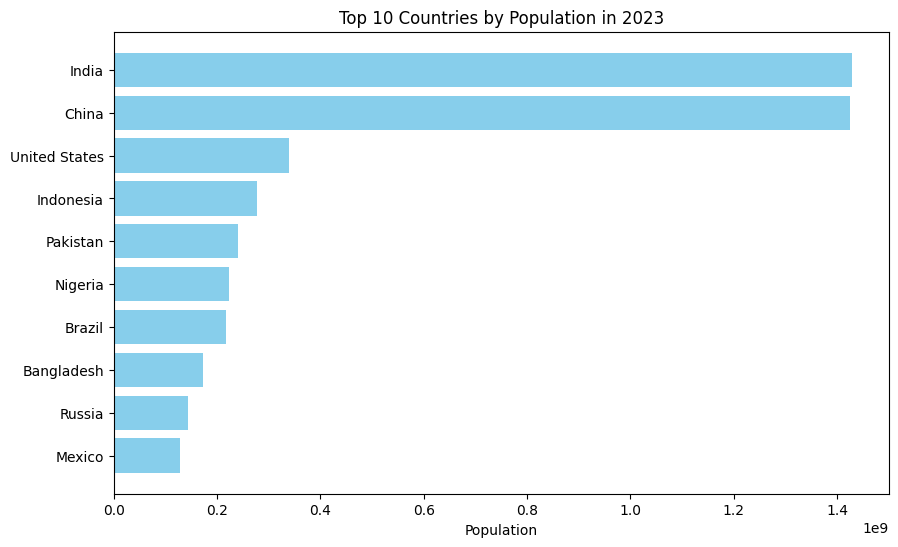

In [7]:
top_10 = df.sort_values(by='2023 population', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10['country'], top_10['2023 population'], color='skyblue')
plt.xlabel('Population')
plt.title('Top 10 Countries by Population in 2023')
plt.gca().invert_yaxis()
plt.show()


**Top 10 Countries with the Largest Land Area**

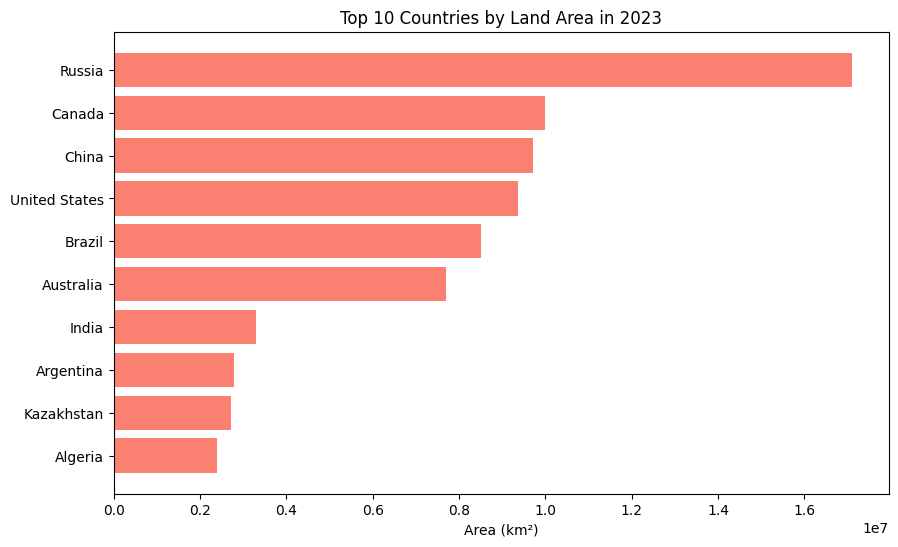

In [14]:
top_10_area = df.sort_values(by='area (km²)', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_area['country'], top_10_area['area (km²)'], color='salmon')
plt.xlabel('Area (km²)')
plt.title('Top 10 Countries by Land Area in 2023')
plt.gca().invert_yaxis()
plt.show()


****Population Comparison for Top 5 Countries Over Time****

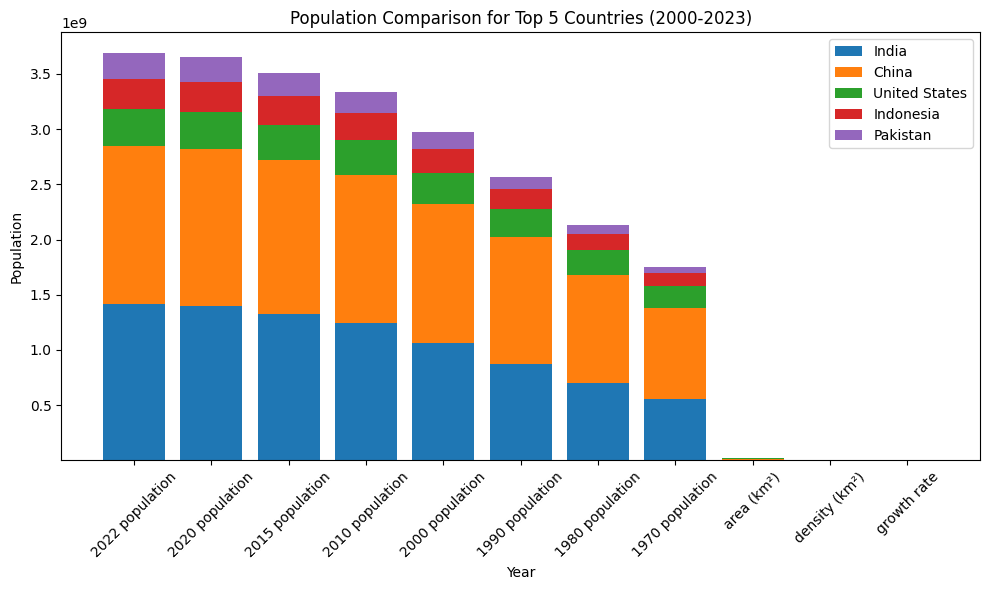

In [19]:
top_5_countries = df.sort_values(by='2023 population', ascending=False).head(5)

plt.figure(figsize=(10, 6))
years = top_5_countries.columns[5:-1]
bottom = [0] * len(years)  # Initializing the bottom of the bars

for index, row in top_5_countries.iterrows():
    plt.bar(years, row[5:-1], bottom=bottom, label=row['country'])
    bottom = [sum(x) for x in zip(bottom, row[5:-1])]  # Updating the bottom for the next iteration

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Comparison for Top 5 Countries (2000-2023)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Piechart

**Population Percentage by Continent**

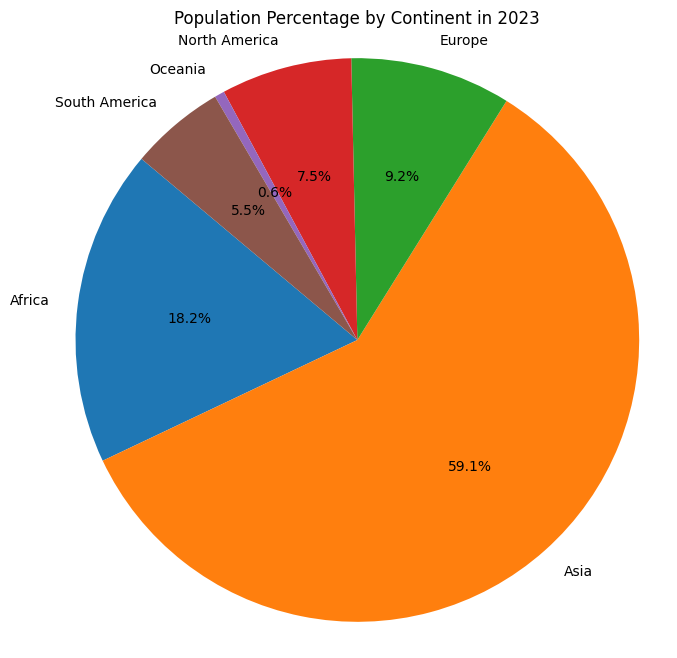

In [8]:
continent_population = df.groupby('continent')['2023 population'].sum()

plt.figure(figsize=(8, 8))
plt.pie(continent_population, labels=continent_population.index, autopct='%1.1f%%', startangle=140)
plt.title('Population Percentage by Continent in 2023')
plt.axis('equal')
plt.show()


# Histogram

**Distribution of Population Growth Rates**

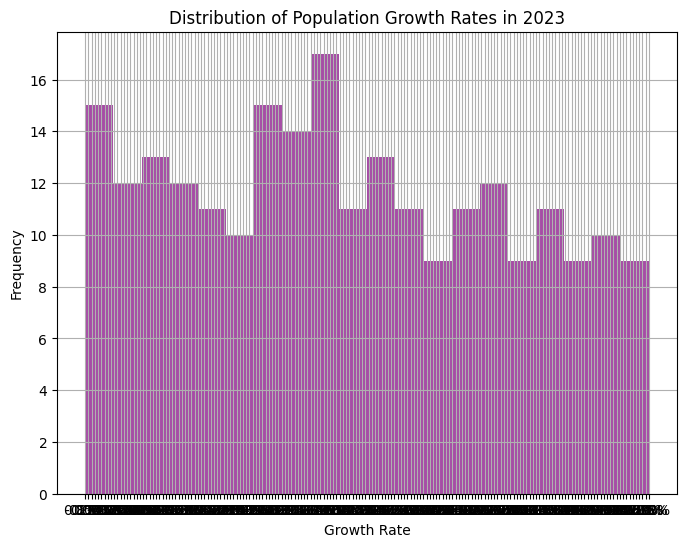

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(df['growth rate'], bins=20, color='purple', alpha=0.7)
plt.xlabel('Growth Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Population Growth Rates in 2023')
plt.grid(True)
plt.show()


# Line Plot

**Population Growth Rate Over Time for highest population country**

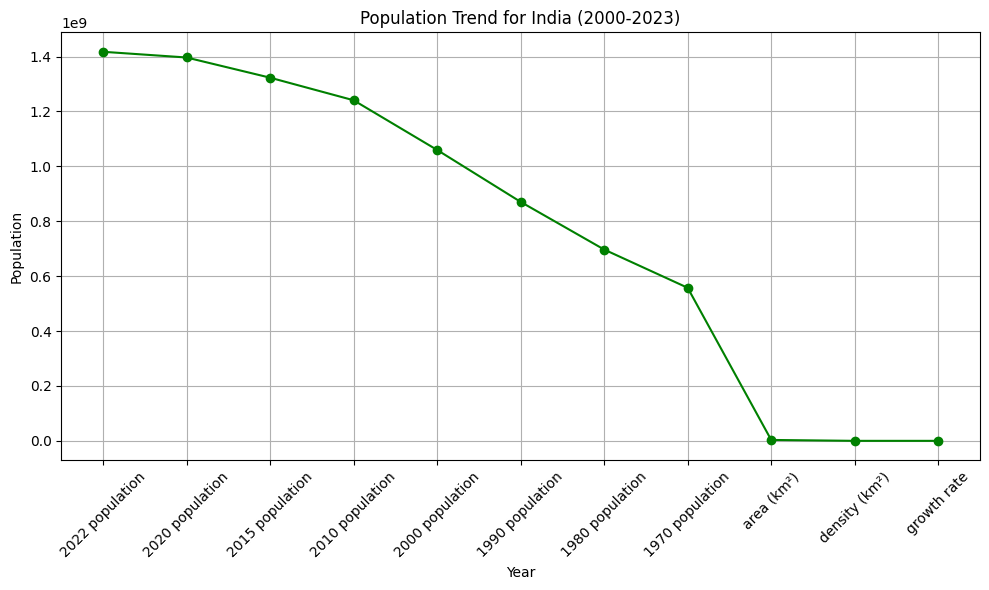

In [17]:
population_columns = df.columns[5:-1]
for col in population_columns:
    df[col] = df[col].replace({'%': ''}, regex=True).astype(float)

country_name = 'India'
country_data = df[df['country'] == country_name]

plt.figure(figsize=(10, 6))
plt.plot(country_data.columns[5:-1], country_data.iloc[0, 5:-1], marker='o', linestyle='-', color='green')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title(f'Population Trend for {country_name} (2000-2023)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Population Growth Rate Comparison for Top 5 Countries**

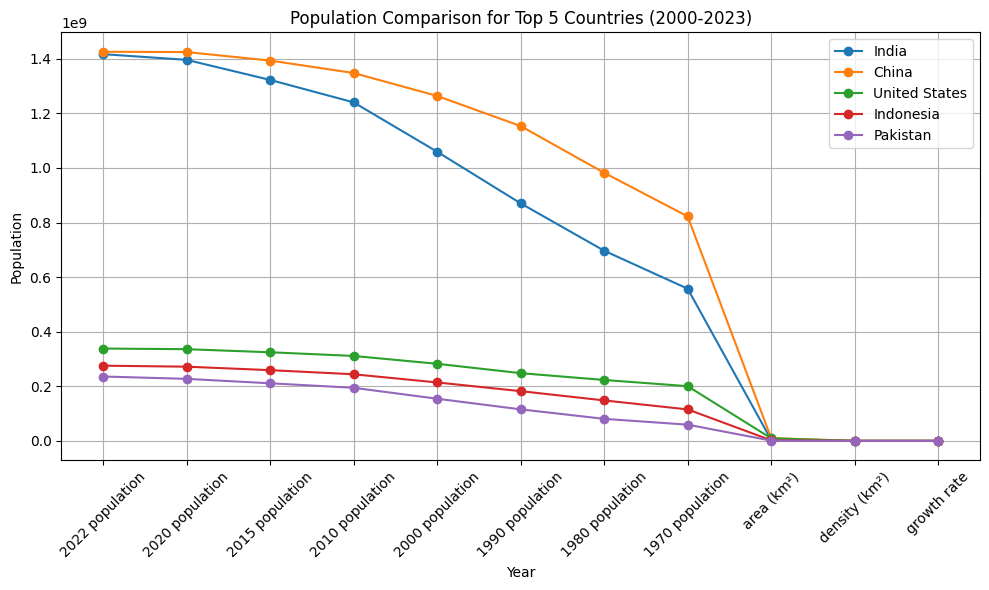

In [21]:
top_5_countries = df.sort_values(by='2023 population', ascending=False).head(5)
plt.figure(figsize=(10, 6))
for index, row in top_5_countries.iterrows():
    plt.plot(top_5_countries.columns[5:-1], row[5:-1], marker='o', label=row['country'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Comparison for Top 5 Countries (2000-2023)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**Population Percentage Growth Comparison for Top 5 Countries**

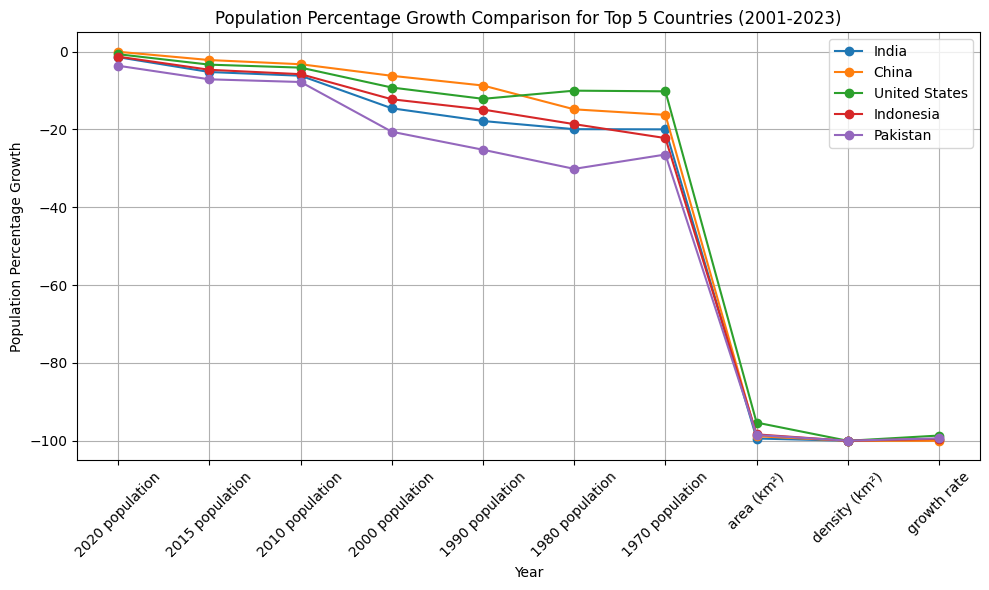

In [26]:
plt.figure(figsize=(10, 6))
for index, row in top_5_countries.iterrows():
    population = row[5:-1]
    percentage_growth = [(population[i+1]-population[i])/population[i] * 100 for i in range(len(population)-1)]
    plt.plot(top_5_countries.columns[5:-1][1:], percentage_growth, marker='o', label=row['country'])  # Adjusting the range

plt.xlabel('Year')
plt.ylabel('Population Percentage Growth')
plt.title('Population Percentage Growth Comparison for Top 5 Countries (2001-2023)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Scatter Plot

**Population Density vs. Area**

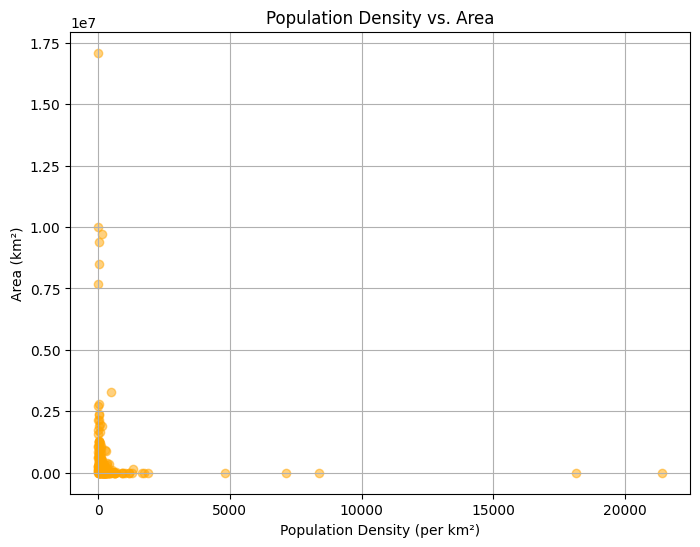

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(df['density (km²)'], df['area (km²)'], alpha=0.5, color='orange')
plt.xlabel('Population Density (per km²)')
plt.ylabel('Area (km²)')
plt.title('Population Density vs. Area')
plt.grid(True)
plt.show()


# Box Plot

**Population Distribution by Continent**

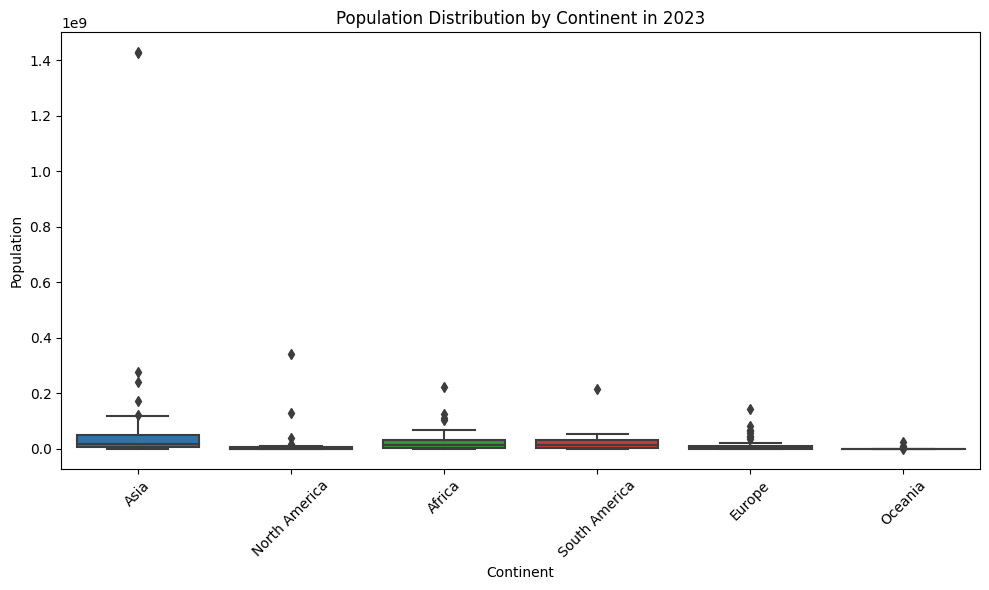

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='continent', y='2023 population', data=df)
plt.title('Population Distribution by Continent in 2023')
plt.ylabel('Population')
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# PairPlot

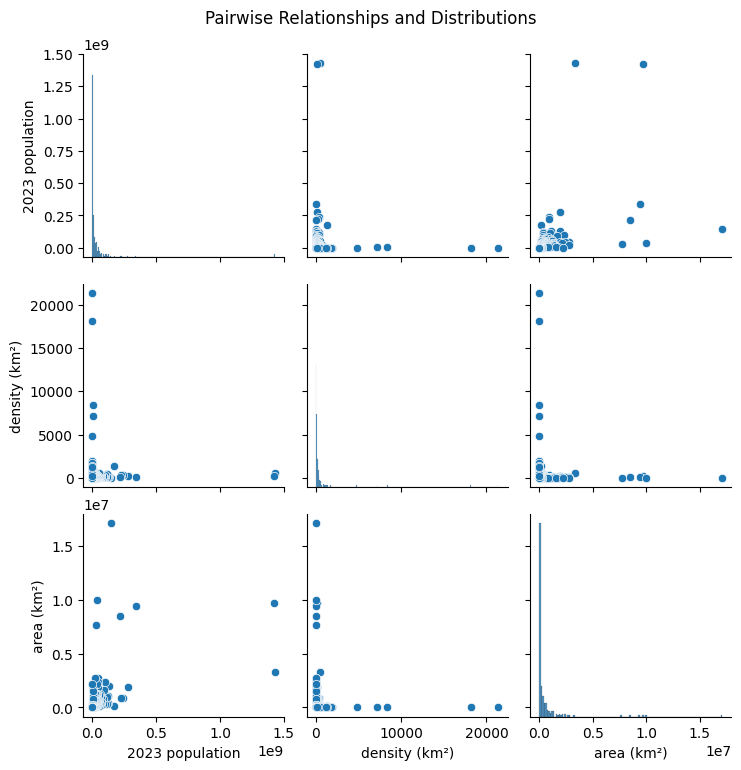

In [16]:
sns.pairplot(df[['2023 population', 'density (km²)', 'area (km²)', 'growth rate']])
plt.suptitle('Pairwise Relationships and Distributions', y=1.02)
plt.show()


# **We have analyse all the possible information through the different plots of World Population Dataset**